# <center> 👉 class 08_4 IP » _Photo_Sketch_ </center>  

we will learn to convert an image into a sketch.  

**cv2.divide(gray_image, inverted_blurred_image, scale)**  

Blur techniques: (remind)

1.Averaging   
>- Averaging with a box filter simply takes the average of all pixels.   
>- This is done by the function by using cv. blur() or cv.boxFilter().  
>- **cv2.blur(image, k_size)**  

2.Gaussing blurring   
>- Gaussian Blurring is to add positive and odd, standard deviation X and Y directions, SigmaX and SigmaY respectively,   
>- It is highly effective to remove the noise from the image.  
>- **cv2.GaussianBlur(image, (k_size), stand_dev $\sigma$)**  
>>- $\sigma$ = 0 : automatically compute $\sigma$ based on our kernel size.  
    
3.Median Blurring   
>- Takes the median of all the pixels under the kernel area as the central element.  
>- It is replaced by the median value.  
>- **cv2.medianBlur(image, k_size)**  

4.Bilateral filtering
>- Bilatering Filtering is highly effective in noise removal while keeping edges with no change.   
>- It does not take into consideration similar pixels’differences.
>- **cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)**  
>>- diameter: diameter of our pixel neighborhood — the larger this diameter is, the more pixels will be included in the blurring computation.  
>>- $\sigma_{color}$ : A larger value for $\sigma_{color}$ means that more colors in the neighborhood will be considered when computing the blur.   
>>>- If we let $ \sigma_{color}$ get too large in respect to the diameter, then we essentially have broken the assumption of bilateral filtering — that only pixels of similar color should contribute significantly to the blur.      
>>- $\sigma_{space}$ : A larger value of $\sigma_{space}$ means that pixels farther out from the central pixel diameter will influence the blurring calculation.

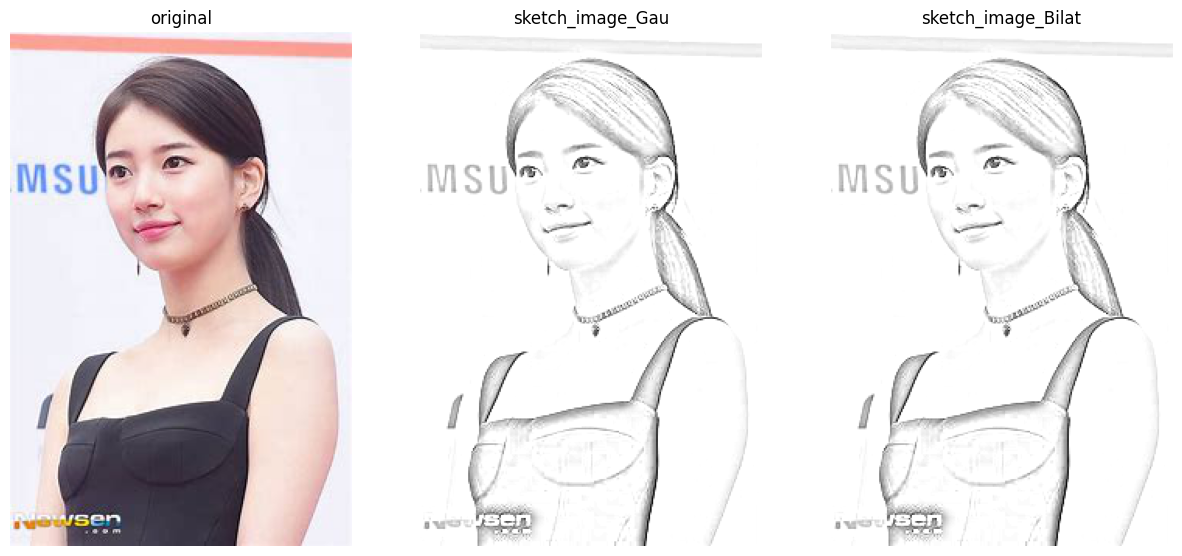

In [1]:
import cv2
import numpy as np

src = cv2.imread("./images/practice_img/suji2.png") # suji2.png  Tom Cruise(Top Gun2).png 
# src = cv2.imread("./images/me2.jpg") # me2.jpg

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
result = np.zeros((src.shape[0], 256), dtype=np.uint8)

inverted_gray_image = cv2.bitwise_not(gray)   # invert the gray image
blurred_image = cv2.GaussianBlur(inverted_gray_image, (21, 21), 0) # # smooting the inverted image by gaussian blur
blurred_image2 = cv2.bilateralFilter(inverted_gray_image, 11, 61,39) # (11, 21, 7),(11, 41, 21),(11, 61, 39) smooting the inverted image by bilateralFilter
inverted_blurred_image = cv2.bitwise_not(blurred_image)    # invert the blurred image
inverted_blurred_image2 =cv2.bitwise_not(blurred_image2)    # invert the blurred image
pencil_sketch_image = cv2.divide(gray, inverted_blurred_image, scale = 256.0)  #create the pencil sketch image
pencil_sketch_image2 = cv2.divide(gray, inverted_blurred_image2, scale = 256.0)  #create the pencil sketch image

cv2.imshow('Original Image', src)
cv2.imshow('sketch_image_Gau', pencil_sketch_image)
cv2.imshow('sketch_image_Bilat', pencil_sketch_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(pencil_sketch_image, cmap='gray'), axs[1].axis('off'), axs[1].set_title('sketch_image_Gau')
axs[2].imshow(pencil_sketch_image, cmap='gray'), axs[2].axis('off'), axs[2].set_title('sketch_image_Bilat')
plt.show()

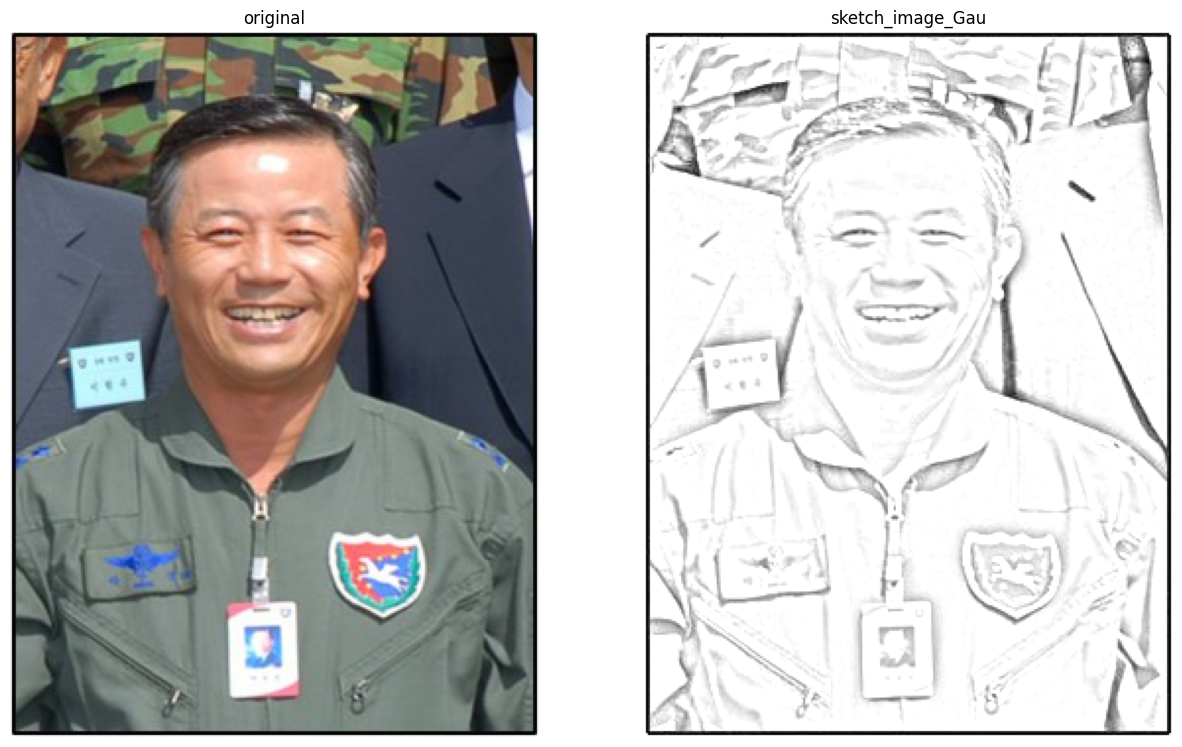

In [6]:
import cv2
import numpy as np

src = cv2.imread("./images/me2.jpg") # suji2.png  Tom Cruise(Top Gun2).png  biden.png 4men.jpg me4.jpg
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

inverted_gray_image =cv2.bitwise_not(gray)   # invert the image
blurred_image = cv2.GaussianBlur(inverted_gray_image, (19,19), 0) # blur the image by gaussian blur
inverted_blurred_image = cv2.bitwise_not(blurred_image)    # invert the blurred image
pencil_sketch_image = cv2.divide(gray, inverted_blurred_image, scale = 256.0)  #create the pencil sketch image

cv2.imshow('Original Image', src)
cv2.imshow('sketch_image_Gau', pencil_sketch_image)
cv2.imwrite('./results/me_sketch.png',pencil_sketch_image )
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(pencil_sketch_image, cmap='gray'), axs[1].axis('off'), axs[1].set_title('sketch_image_Gau')
plt.show()

## Assgn 07